## Datacamp: Exploratory Data Analysis in Python

### Part 2 Notebook: Distributions

### <center> **There are issues and depreciated functions with the course provided PMF and CDF functions and plotting** </center>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pip install empiricaldist    #pip install empiricaldist to access Pmf
%matplotlib inline

In [110]:
# Create and review DataFrame
gss = pd.read_hdf('Data/gss.hdf5', 'gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


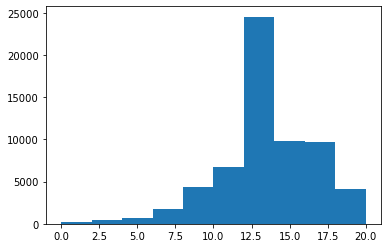

In [74]:
# Create Histogram to visualize distribution

educ = gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.show()

## <center>  **Issues with Datacamp provided PMF and CDF functions and plotting** </center>

In [75]:
#Import library from Datacamp for Probability Mass Function
from empiricaldist import Pmf

In [76]:
pmf_educ = Pmf(educ)

# Select the age column
age = gss['age']

#Make a PMF of age
pmf_age = Pmf(age)

# Plot PMF as Bar chart
pmf_age.bar()

# Label Axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021DBB7DD1F0> (for post_execute):


KeyboardInterrupt: 

In [77]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF as bar chart
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021DBB7DD1F0> (for post_execute):


KeyboardInterrupt: 

## <center>  **Issues with Datacamp provided PMF and CDF functions and plotting** </center>

In [78]:
# Import CDF
from empiricaldist import Cdf

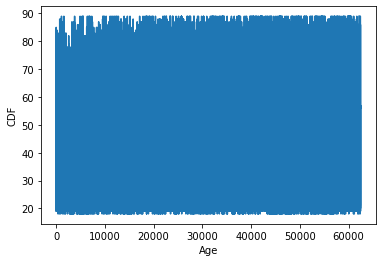

In [79]:
# Creat CDF for Age
cdf = Cdf(gss['age'])

#Plot CDF

cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')

plt.show()

In [80]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

27.0


In [18]:
# Calculate the 75th percentile of Income from GSS dataset

cdf_income = gss['realinc']

# Calculate the 75th percentile
p = 0.75
percentile_75th = cdf_income.inverse(p)
print(percentile_75th)

# Calculate the 25th percentile
p = 0.25
percentile_25th = cdf_income.inverse(p)
print(percentile_25th)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th
print(iqr)

AttributeError: 'Series' object has no attribute 'inverse'

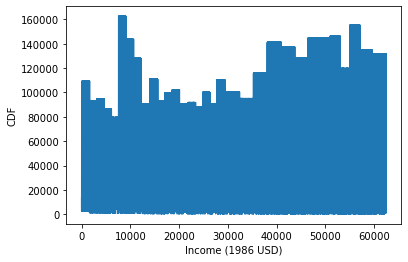

In [90]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

### Comparing Distributions

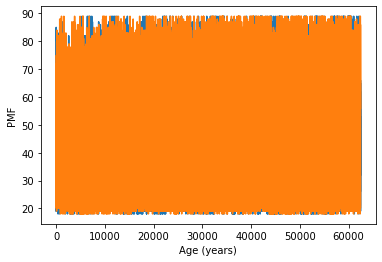

In [82]:
#Multiple PMFs
male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]

# Create 2 PMFs and plot
Pmf(male_age).plot(label='Male')
Pmf(female_age).plot(label='Female')

plt.xlabel('Age (years)')
plt.ylabel('PMF')
plt.show()


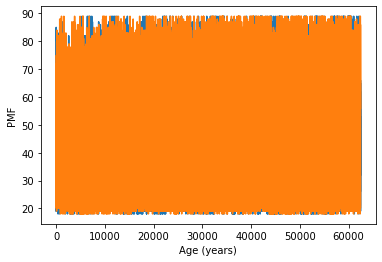

In [28]:
# Create 2 PMFs and plot
Cdf(male_age).plot(label='Male')
Cdf(female_age).plot(label='Female')

plt.xlabel('Age (years)')
plt.ylabel('PMF')
plt.show()

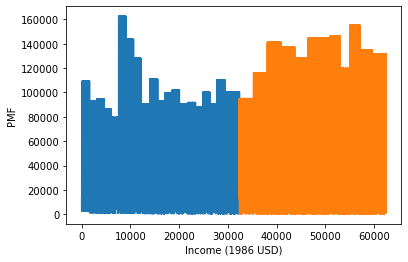

In [33]:
# Income Distribution variables
income = gss['realinc']
pre95 = gss['year'] < 1995

#Create PMFs and plot
Pmf(income[pre95]).plot(label='Before 1995')
Pmf(income[~pre95]).plot(label='After 1995')

plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.show()


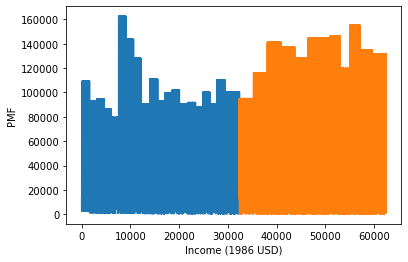

In [34]:
#Create CDFs and plot
Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995')

plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.show()


In [35]:
# Create Boolean Series to identify respondents with different levels of education.

# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school
high = (educ <= 12)
print(high.mean())

0.5308807991547402


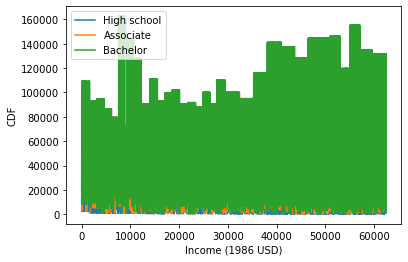

In [36]:
# Distribution of income for people with different education levels

income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

## Modeling Distributions

In [37]:
from scipy.stats import norm

In [64]:
# Generate random samples and normalize

sample = np.random.normal(size=1000)
sample_cdf = Cdf(sample)

xs = np.linspace(-3, 3)
ys = norm(0,1).cdf(xs)

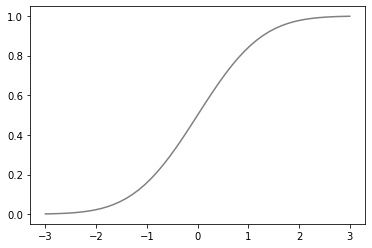

In [65]:
# Plot Cdf of Data

plt.plot(xs, ys, color='gray')
plt.show()

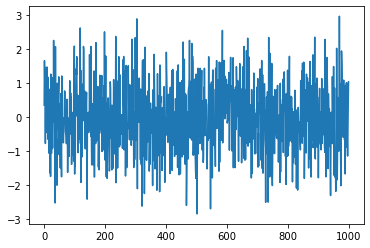

In [62]:
#Plot and confirm that Normal Distribution is a good model for data

plt.plot(sample_cdf)
plt.show()

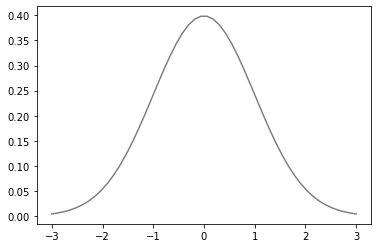

In [61]:
# Plot PDF of Data

xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, color='gray')

In [67]:
# import Seaborn
import seaborn as sns

<AxesSubplot:ylabel='Density'>

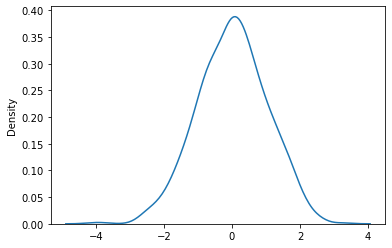

In [70]:
#Create KDE plot
sns.kdeplot(sample)

<AxesSubplot:ylabel='Density'>

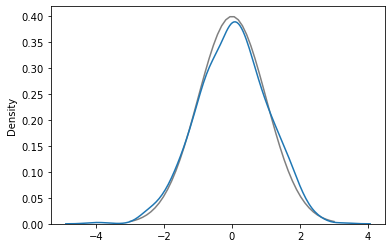

In [71]:
# Create and compare KDE and PDF plots
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)

<AxesSubplot:ylabel='Density'>

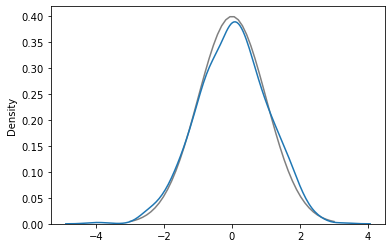

In [91]:
# Create and compare KDE and PDF plots
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)

In [99]:
from scipy.stats import norm

# Distribution of income

# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Normalize and make a norm object
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


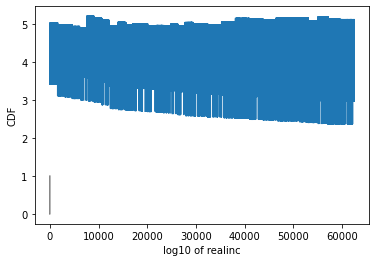

In [106]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

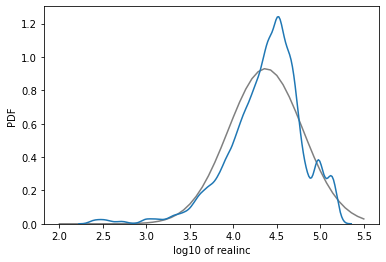

In [108]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()